In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Transformers/textamazon

/content/drive/MyDrive/Transformers/textamazon


In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.1.0)
2021-07-11 11:06:14.159972: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

# spacy.prefer_gpu()
import re
import string

In [ ]:
# MOST IMP NOTE:: WHILE USING TRANSFORMER LIBRARY
# 1. ALL LABELS SHOULD BE PURE INTEGER DATATYPE & 
# 2. LABEL STARTS FROM (0 - len(label)-1)

In [ ]:
%cd /content/drive/MyDrive/NLP/AmazonTextClassification/

[Errno 2] No such file or directory: '/content/drive/MyDrive/NLP/AmazonTextClassification/'
/content/drive/MyDrive/Transformers/textamazon


In [ ]:
!pip install imbalanced-learn

In [ ]:
!python --version
!pip install transformers
!pip install sentencepiece

Python 3.7.10
     |████████████████████████████████| 2.5MB 26.6MB/s 
     |████████████████████████████████| 901kB 53.8MB/s 
     |████████████████████████████████| 3.3MB 49.8MB/s 
     |████████████████████████████████| 1.2MB 35.2MB/s 


In [ ]:
import torch
import pandas as pd
import numpy as np
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer,DistilBertForSequenceClassification
print(torch.__version__)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


1.9.0+cu102


In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print(device)
else:
  device = torch.device('cpu')
  print(device)

cuda


In [ ]:
DataFrame = pd.read_csv('amazonData2.csv')

In [ ]:
DataFrame.sample(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
5709,A338C5C02U370O,B001F6YRNO,kim-berly,"[0, 0]",I'm using the memory cards in my Sansa e270 v1...,5.0,I have no complaints,1281052800,"08 6, 2010"
16200,A9P4Q7KX35RS2,B003MVMTDA,L. Jones,"[0, 0]","This drive is very fast, rugged and works ever...",5.0,rugged and dependable,1373587200,"07 12, 2013"
12059,AU2XFETZI52AC,B003S6CO9I,Basil A Ba-aziz,"[0, 0]",I really liked this product and I am using it ...,5.0,Excellent product it does what it says,1371859200,"06 22, 2013"
5386,A93YHLIA08ZHW,B000PC4A0O,J. Hall,"[0, 0]",NICE little unit for studio shots of small ite...,5.0,Instant studio. Just add the camera!,1385769600,"11 30, 2013"
10683,A2CISO7FOPGT9A,B0018P7WZ2,Richard U. Newell,"[0, 0]","Does everything that is advertised, I found an...",4.0,Does a very good job,1232150400,"01 17, 2009"
17365,A3HQDVJ3Y0KBBG,B002WE6D44,James m jones,"[0, 0]",Shot 70 images file attempted to down load on ...,1.0,Shot about 70 images now getting reading of be...,1357344000,"01 5, 2013"
2510,A270TQ3GFXMI7P,B001UI2FPE,"Tony and Julie ""Tony and Julie""","[0, 1]",Just wanted to let folks know that this modem ...,4.0,Did not receive a retail unit...,1318723200,"10 16, 2011"
19158,A3EEQO8MUXFINX,B00GSPW2QG,Kevin Courcey,"[5, 5]","this is a really nice tablet, very much like a...",3.0,"Good tablet, crappy charger",1398470400,"04 26, 2014"
956,A3J6Q0Y0SKY7AR,B000EFIJTA,"EngrPaul ""EngrPaul""","[0, 0]",I didn't realize how short this was (my fault)...,5.0,Short and Simple,1319414400,"10 24, 2011"
18742,A37SGUQGIDFOKK,B0074BW614,Lee,"[0, 0]",This is exactly what I was looking for! Compa...,5.0,Kindle Fire,1396742400,"04 6, 2014"


In [ ]:
DataFrame = DataFrame.dropna(subset=['reviewText'],axis=0)

In [ ]:
# Here our feature column is reviewText & Label column is overall.
sentences = DataFrame['reviewText']
labels = DataFrame['overall'].astype('int64').apply(lambda x : x-1)

In [ ]:
# unique Labels
unique_labels = np.unique(labels)
print(unique_labels)
print(len(unique_labels))

[0 1 2 3 4]
5


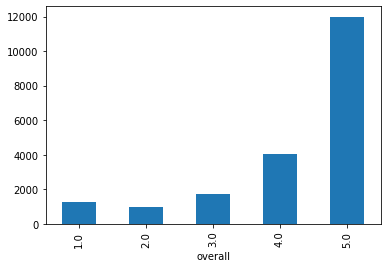

In [ ]:
# yes it is totally unbalanced Dataset...
DataFrame.groupby('overall').count()['reviewText'].plot(kind='bar')

In [ ]:
# first split the data so that we can apply the same preprocessing steps to the test data

In [ ]:
# put stratified to labels so that proportion of class will be same on train & test dataset
xtrain, xtest , ytrain ,ytest = train_test_split(sentences,labels,test_size=0.25,shuffle=True,stratify=labels)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(14992,)
(14992,)
(4998,)
(4998,)


In [ ]:
xtrain = np.array(xtrain).reshape(-1,1)
xtest = np.array(xtest).reshape(-1,1)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [ ]:
# check the proportion ratio of each class is same or not
print(pd.Series(ytrain).value_counts()/len(ytrain))
print('*'*50)
print(pd.Series(ytest).value_counts()/len(ytest))

4    0.599586
3    0.203575
2    0.086513
0    0.062166
1    0.048159
dtype: float64
**************************************************
4    0.599640
3    0.203681
2    0.086435
0    0.062025
1    0.048219
dtype: float64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def OverSm(xtrain,ytrain):
  os = RandomOverSampler()
  xtrain_os ,ytrain_os = os.fit_resample(xtrain,ytrain)
  return xtrain_os,ytrain_os

In [ ]:
xtrain_os,ytrain_os = OverSm(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(xtrain.shape,xtrain_os.shape)
print(ytrain.shape,ytrain_os.shape)

(14992, 1) (44945, 1)
(14992,) (44945,)


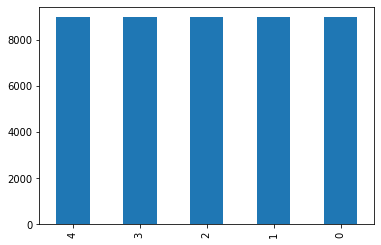

In [ ]:
# now it's fine
pd.Series(ytrain_os).value_counts().plot(kind='bar')

In [ ]:
# now check final all shape
print(xtrain_os.shape,ytrain_os.shape)
print(xtest.shape,ytest.shape)

(44945, 1) (44945,)
(4998, 1) (4998,)


In [ ]:
print(type(xtrain_os),type(ytrain_os))
print(type(xtest),type(ytest))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
xtrain_os = list(np.concatenate(xtrain_os,axis=0))
xtest = list(np.concatenate(xtest,axis=0))
ytest = list(ytest)
ytrain_os = list(ytrain_os)

In [ ]:
print(type(xtrain_os))
print(type(ytrain_os))
print(type(xtest))
print(type(ytest))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
def CleanTextTrain(xtrain):

  nlp = spacy.load('en_core_web_sm')
  new_xtrain = []
  for text in xtrain:
    text = text.lower()
    text = ' '.join(re.sub('[^a-z]',' ',text).split())

    doc = nlp(text)
    sent = ' '.join([token.lemma_ for token in doc])
    new_xtrain.append(sent)

  return new_xtrain

In [ ]:
xtrain_os = CleanTextTrain(xtrain_os)
xtest = CleanTextTrain(xtest)

In [ ]:
# change shape 1D required for Tokenizer
# xtrain_os = np.squeeze(xtrain_os,axis=1)
# xtest = np.squeeze(xtest,axis=1)

In [ ]:
# Loading the Distilbert Tokenizer from hugging-face-Hub
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')

In [ ]:
def Traintokenize(xtrain,ytrain_os):
  input_ids = []
  Attention_Masks= []

  for sent in xtrain_os:
    encodings = tokenizer.encode_plus(sent,add_special_tokens=True,max_length=128,padding='max_length',truncation=True,return_tensors='pt',return_attention_mask=True)
    input_ids.append(encodings['input_ids'])
    Attention_Masks.append(encodings['attention_mask'])

  input_ids = torch.cat(input_ids,dim=0)
  Attention_Masks = torch.cat(Attention_Masks,dim=0)
  ytrain_os = torch.tensor(ytrain_os)
  
  return input_ids,Attention_Masks ,ytrain_os



def Testtokenize(xtest,ytest):
  input_ids = []
  Attention_Masks= []

  for sent in xtest:
    encodings = tokenizer.encode_plus(sent,add_special_tokens=True,padding='max_length',truncation=True,return_tensors='pt',return_attention_mask=True,max_length=128)
    input_ids.append(encodings['input_ids'])
    Attention_Masks.append(encodings['attention_mask'])

  input_ids = torch.cat(input_ids,dim=0)
  Attention_Masks = torch.cat(Attention_Masks,dim=0)
  ytest = torch.tensor(ytest)
  
  return input_ids,Attention_Masks ,ytest

In [ ]:
input_idsTrain,Attention_MasksTrain ,ytrain_labels = Traintokenize(xtrain_os,ytrain_os)
input_idsTest,Attention_MasksTest,ytest = Testtokenize(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
# create pytorch Dataset
from torch.utils.data import DataLoader,RandomSampler,SequentialSampler,TensorDataset

In [ ]:
TrainDataset = TensorDataset(input_idsTrain,Attention_MasksTrain,ytrain_labels)
TestDataset = TensorDataset(input_idsTest,Attention_MasksTest,ytest)

In [ ]:
TrainDataLoader = DataLoader(TrainDataset,batch_size=16,sampler=RandomSampler(TrainDataset))
TestdataLoader = DataLoader(TestDataset,batch_size=8,sampler=SequentialSampler(TestDataset))

In [ ]:
# Calling the Model
Model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
    num_labels = 5 , # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
    return_dict=False)

Model.to(device)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bia

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
from transformers import AdamW
from datetime import datetime

In [ ]:
optimizer = AdamW(Model.parameters(),lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8)


In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# Training
from datetime import datetime
training_stats = []
Epochs = 3

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
for epo_i in range(1,Epochs+1):
  Model.train() # put model into train mode
  
  training_loss = 0
  t0 = datetime.now()
  for step ,trainBatch in enumerate(TrainDataLoader):

    inputId  = trainBatch[0].to(device)
    masks  = trainBatch[1].to(device)
    label = trainBatch[2].to(device)

    optimizer.zero_grad()

    loss ,logits = Model(inputId,attention_mask=masks,labels=label)
   
  

    training_loss = training_loss + loss.item()
    loss.backward()
    optimizer.step()
  
  Train_time = ((datetime.now()-t0).seconds)/60
  
  avg_train_loss = training_loss/len(TrainDataLoader)

  Model.eval()
  val_loss = 0
  val_accuracy = 0
  t0 = datetime.now()

  for index,testBatch in enumerate(TestdataLoader):

    inputId  = testBatch[0].to(device)
    masks = testBatch[1].to(device)
    label = testBatch[2].to(device)

    with torch.no_grad():
      loss ,logits = Model(inputId,attention_mask = masks,labels = label)
    
    val_loss = val_loss + loss.item()

    logits = logits.detach().cpu().numpy()
    label = label.to('cpu').numpy()
    val_accuracy = val_accuracy + flat_accuracy(logits,label)
  
  val_time = ((datetime.now()-t0).seconds)/60
  avg_val_loss = val_loss/ len(TestdataLoader)
  avg_val_accuracy = val_accuracy /len(TestdataLoader)

  training_stats.append({
      'epo_i':epo_i,
      'avg_train_loss':avg_train_loss,
      'Train_time In MIN':Train_time,
      'avg_val_loss': avg_val_loss,
      'avg_val_accuracy':avg_val_accuracy,
      'val_time In MIN':val_time
  })

  print(training_stats[epo_i-1])


cuda
{'epo_i': 1, 'avg_train_loss': 0.8026186589325622, 'Train_time In MIN': 8.65, 'avg_val_loss': 1.1753178149223327, 'avg_val_accuracy': 0.5628666666666667, 'val_time In MIN': 0.31666666666666665}
{'epo_i': 2, 'avg_train_loss': 0.3033461079485317, 'Train_time In MIN': 8.833333333333334, 'avg_val_loss': 1.4319510770082473, 'avg_val_accuracy': 0.5709333333333333, 'val_time In MIN': 0.31666666666666665}
{'epo_i': 3, 'avg_train_loss': 0.1736565388622383, 'Train_time In MIN': 8.833333333333334, 'avg_val_loss': 1.4679051909923553, 'avg_val_accuracy': 0.6316, 'val_time In MIN': 0.31666666666666665}


In [ ]:
saveDir = "ModelDir/"
Model.save_pretrained(save_directory=saveDir)
tokenizer.save_pretrained(save_directory=saveDir)

('ModelDir/tokenizer_config.json',
 'ModelDir/special_tokens_map.json',
 'ModelDir/vocab.txt',
 'ModelDir/added_tokens.json')

In [ ]:
saveDir = "ModelDir/"
loaded_tokenizer = DistilBertTokenizer.from_pretrained(saveDir)
loaded_model = DistilBertForSequenceClassification.from_pretrained(saveDir)

In [ ]:
test_text='Hi! This is Sarang from DLCVNLP batch.'

In [ ]:
predict_input = loaded_tokenizer.encode_plus(test_text,add_special_tokens=True,max_length=128,padding='max_length',truncation=True,return_tensors='pt',return_attention_mask=True)

print(predict_input)
# there are two ways
output = loaded_model(predict_input['input_ids'],predict_input['attention_mask'])[0]
# output = loaded_model(**predict_input)[0]


{'input_ids': tensor([[  101,  8790,   106,  1188,  1110,  6936,  2118,  1121, 26624,  1658,
         18198, 20009, 15817,   119,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [ ]:
# prediction_value = tf.argmax(output, axis=1).numpy()[0] to do in tf
prediction_value = torch.argmax(output, dim=1).item() # correct way in torch
# prediction_value = np.argmax(output.detach().numpy()) way to do in numpy

In [ ]:
prediction_value

4

MODEL QUANTIZATION

In [ ]:
# Model Quantization

In [ ]:
# step 1.
# we will apply the Dynamic Quantization & can save it or pass during runtime..

quantized_model = torch.quantization.quantize_dynamic(
    loaded_model, {torch.nn.Linear}, dtype=torch.qint8  # we will apply quantization on Dense layers
)
# print(quantized_model)

In [ ]:
# prediction using quantized model..
output = quantized_model(predict_input['input_ids'],predict_input['attention_mask'])[0]
prediction_value = torch.argmax(output, dim=1).item()
prediction_value

4

In [ ]:
# saving the quantized model... 

In [ ]:
torch.save(quantized_model,'quantized_model.pt')

In [ ]:
quantized_model = torch.load('quantized_model.pt')
output = quantized_model(predict_input['input_ids'],predict_input['attention_mask'])[0]
prediction_value = torch.argmax(output, dim=1).item()
prediction_value

4

In [ ]:
# Three Method  of using model

# 1. load complete heavy model ==> 3rd Rank Good

# 2. load heavy model then make dynamic quantized ,do prediction==> 2nd Rank Good
"""2nd model for BART,PEGASUS,T5 because they are having both (ENCODER-DECODER)"""

# 3. make model quantize & save in (.pt or .pth) & load for prediction. ===> Best way (1st Rank)

'2nd model for BART,PEGASUS,T5 because they are having both (ENCODER-DECODER)'